Import Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv("/content/OnlineRetail.csv", encoding="latin", dtype={'CustomerID': str})

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


# **Exploratory Data Analysis**

Overview

In [4]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [5]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,object
Country,object


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


In [8]:
df.isnull().sum() #dealing with null values

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df = df.drop(columns=['CustomerID']) #CustomerID has too many null values so we have droped it

In [10]:
df[df['Description'].isnull()].head() #check out what kind of nulls we have in Description

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,United Kingdom


In [12]:
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')
df.isnull().sum()

#The data in these rows is pretty strange as UnitPrice is 0, so these orders do not generate any sales.
#We can impute it with "UNKNOWN ITEM" at the moment and deal with those later during the analysis."""

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [13]:
df['Description'].value_counts().head() #Checking out columns separately

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638


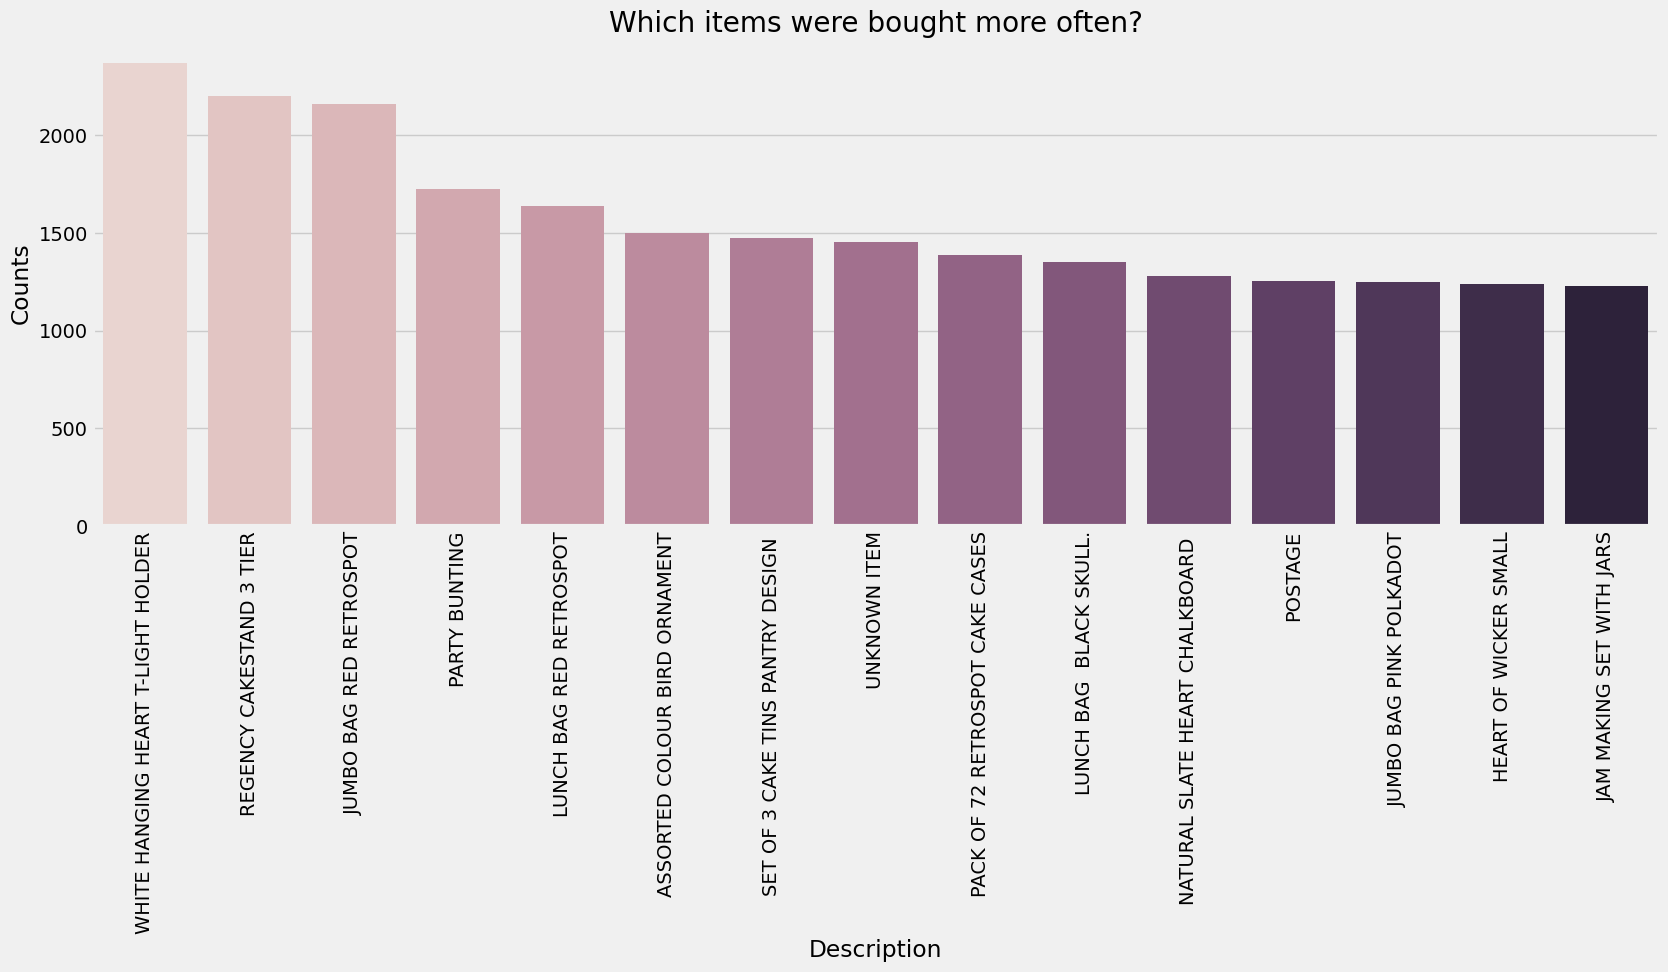

In [14]:
# to make it visually more appealing let's create a bar chart for 15 top items
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [15]:
df['Description'].value_counts().tail()

,count
Description,
Missing,1
historic computer difference?....se,1
DUSTY PINK CHRISTMAS TREE 30CM,1
WRAP BLUE RUSSIAN FOLKART,1
PINK BERTIE MOBILE PHONE CHARM,1


In [17]:
#We also notice from the above code that valid items are normally uppercase and non-valid or cancelations are in lowercase.

In [18]:
df[~df['Description'].str.isupper()]['Description'].value_counts().head()

,count
Description,
Manual,572
BAG 125g SWIRLY MARBLES,304
BAG 250g SWIRLY MARBLES,252
3 TRADITIONAl BISCUIT CUTTERS SET,240
POLYESTER FILLER PAD 40x40cm,193


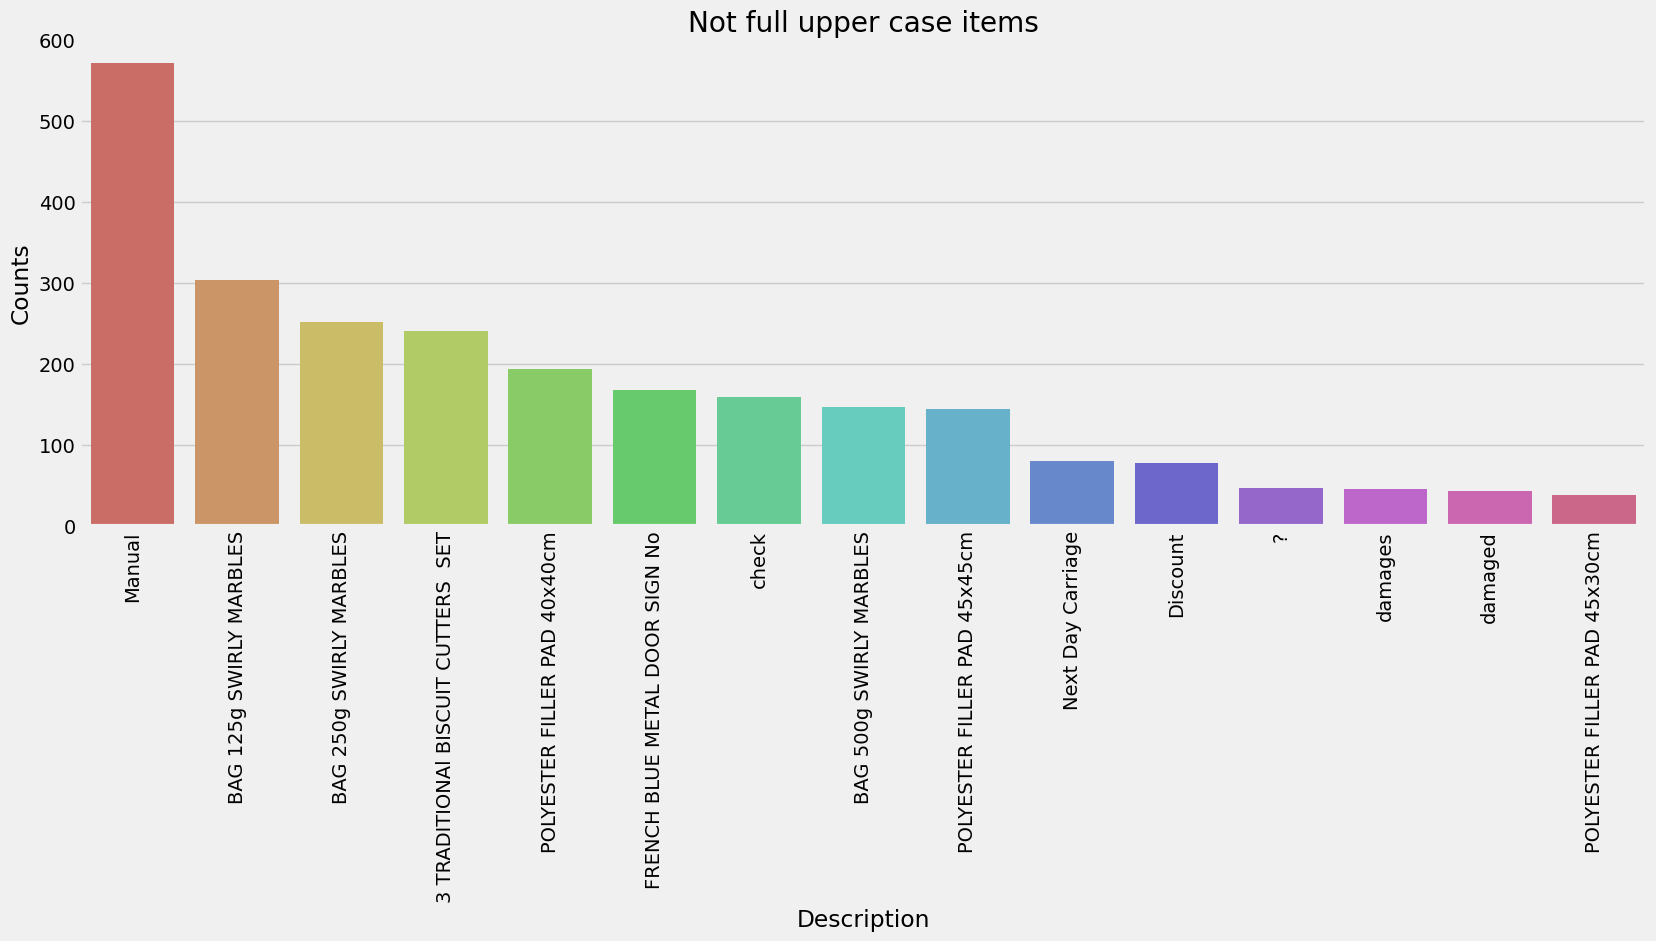

In [19]:
# Not full upper case items
lcase_counts = df[~df['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=lcase_counts.index, y=lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

In [20]:
"""Checking out stoke codes looks like they are deeply correlated with descriptions - which makes perfect sense."""

'Checking out stoke codes looks like they are deeply correlated with descriptions - which makes perfect sense.'

In [21]:
df['StockCode'].value_counts().head()

,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639


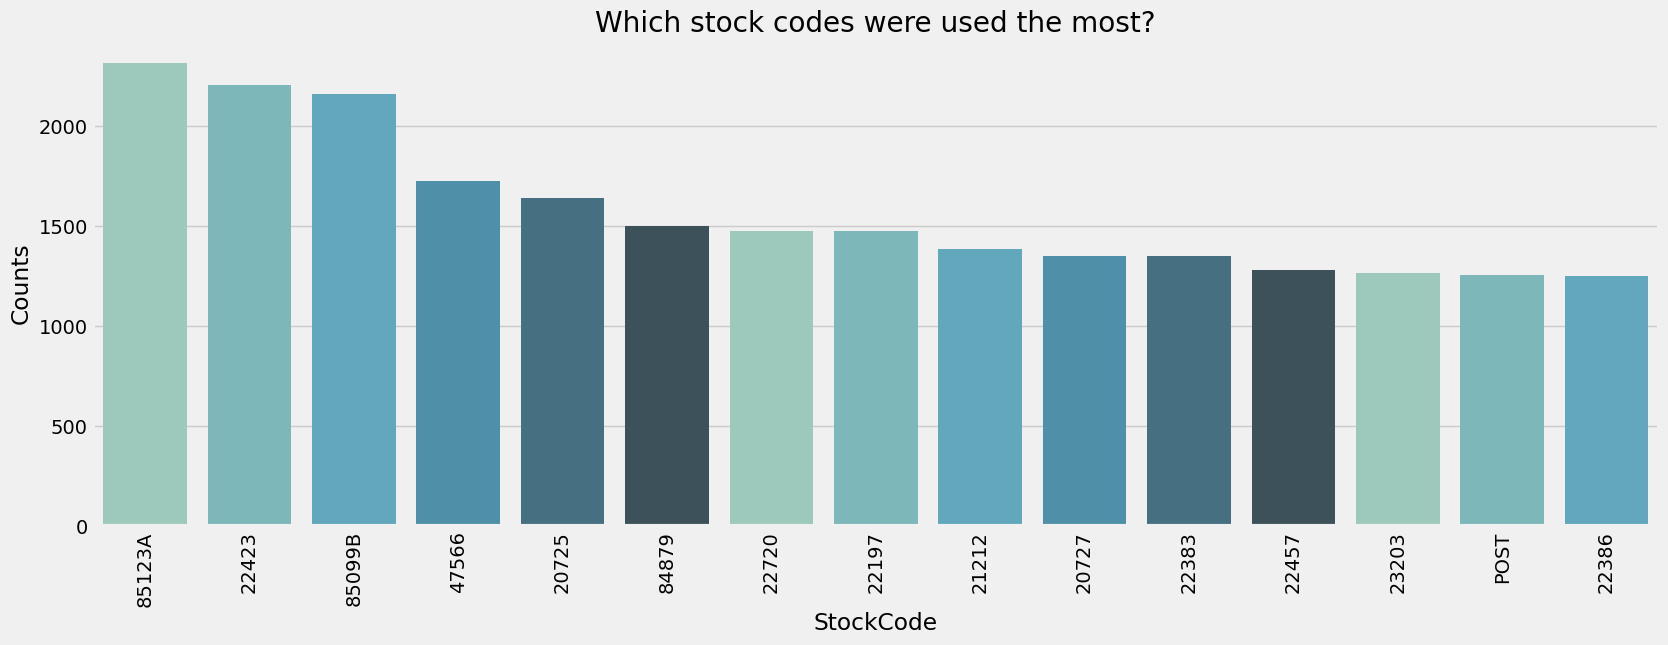

In [22]:
# Which stock codes were used the most?
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

In [23]:
df['InvoiceNo'].value_counts().tail() #we are also checking the invoice number feature

,count
InvoiceNo,
554023,1
554022,1
554021,1
554020,1
C558901,1


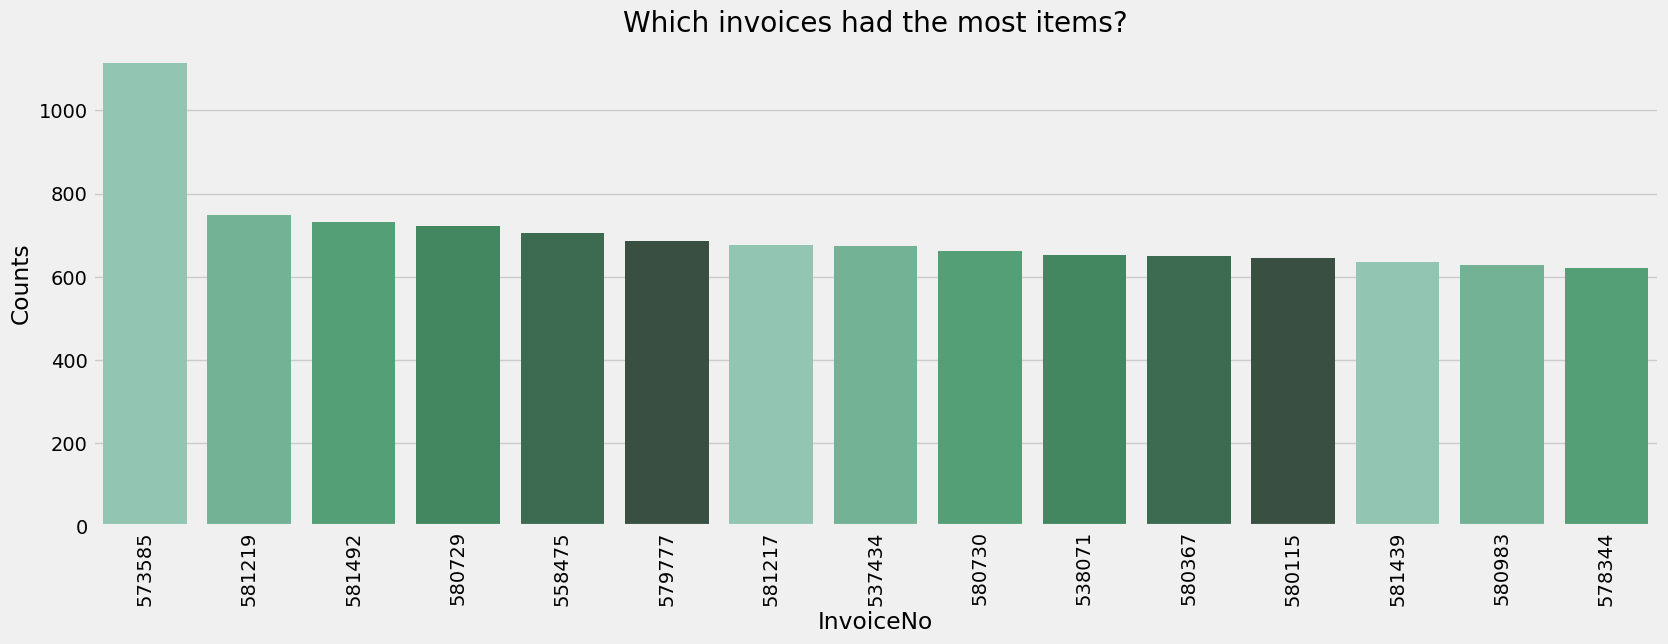

In [24]:
#  Which invoices had the most items?
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=inv_counts.index, y=inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [25]:
df[df['InvoiceNo'].str.startswith('C')].describe()

,Quantity,UnitPrice
count,9288.000000,9288.000000
mean,-29.885228,48.393661
std,1145.786965,666.600430
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,5.950000
max,-1.000000,38970.000000


In [26]:
""" Looks like Invoices that start with 'C' are the "Canceling"/"Returning" invoices. This resolves the mystery of negative quantities."""

' Looks like Invoices that start with \'C\' are the "Canceling"/"Returning" invoices. This resolves the mystery of negative quantities.'

In [27]:
df = df[~df['InvoiceNo'].str.startswith('C')]

In [28]:
df.describe()

,Quantity,UnitPrice
count,532621.000000,532621.000000
mean,10.239972,3.847621
std,159.593551,41.758023
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


Here we can see that other "Negative quantities" appear to be damaged/lost/unknown items.
Again, we will just ignore them for the sake of simplicity of analysis for this project.

In [30]:

df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 16:50:00,536589,21777,UNKNOWN ITEM,-10,0.0,United Kingdom
2010-12-02 14:42:00,536764,84952C,UNKNOWN ITEM,-38,0.0,United Kingdom
2010-12-03 15:30:00,536996,22712,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536997,22028,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536998,85067,UNKNOWN ITEM,-6,0.0,United Kingdom


In [31]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [32]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


We also see negative UnitPrice, which is not normal as well.

In [33]:
df[df['UnitPrice'] == -11062.06]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,United Kingdom


As there are just two rows, let's ignore them

In [34]:
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


As we have finished cleaning our data and removed all suspicious records we can start creating some new features for our model.

([0], [Text(0, 0, 'United Kingdom')])

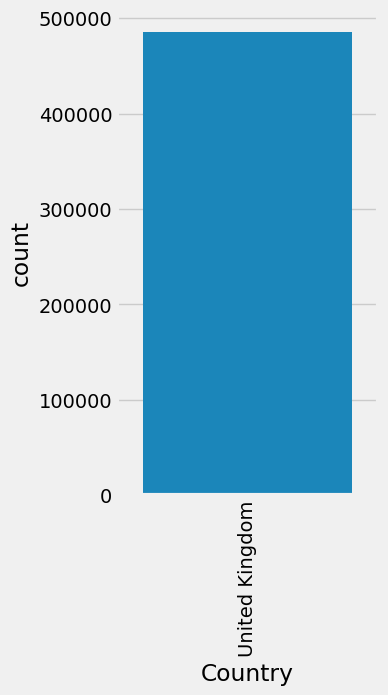

In [35]:
plt.figure(figsize=(3,6))
sns.countplot(x=df[df['Country'] == 'United Kingdom']['Country'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'France'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Norway'),
  Text(5, 0, 'EIRE'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Belgium'),
  Text(12, 0, 'Lithuania'),
  Text(13, 0, 'Japan'),
  Text(14, 0, 'Iceland'),
  Text(15, 0, 'Channel Islands'),
  Text(16, 0, 'Denmark'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Finland'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Bahrain'),
  Text(22, 0, 'Israel'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Hong Kong'),
  Text(25, 0, 'Singapore'),
  Text(26, 0, 'Lebanon'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Saudi Arabia'),
  Text(29, 0, 'C

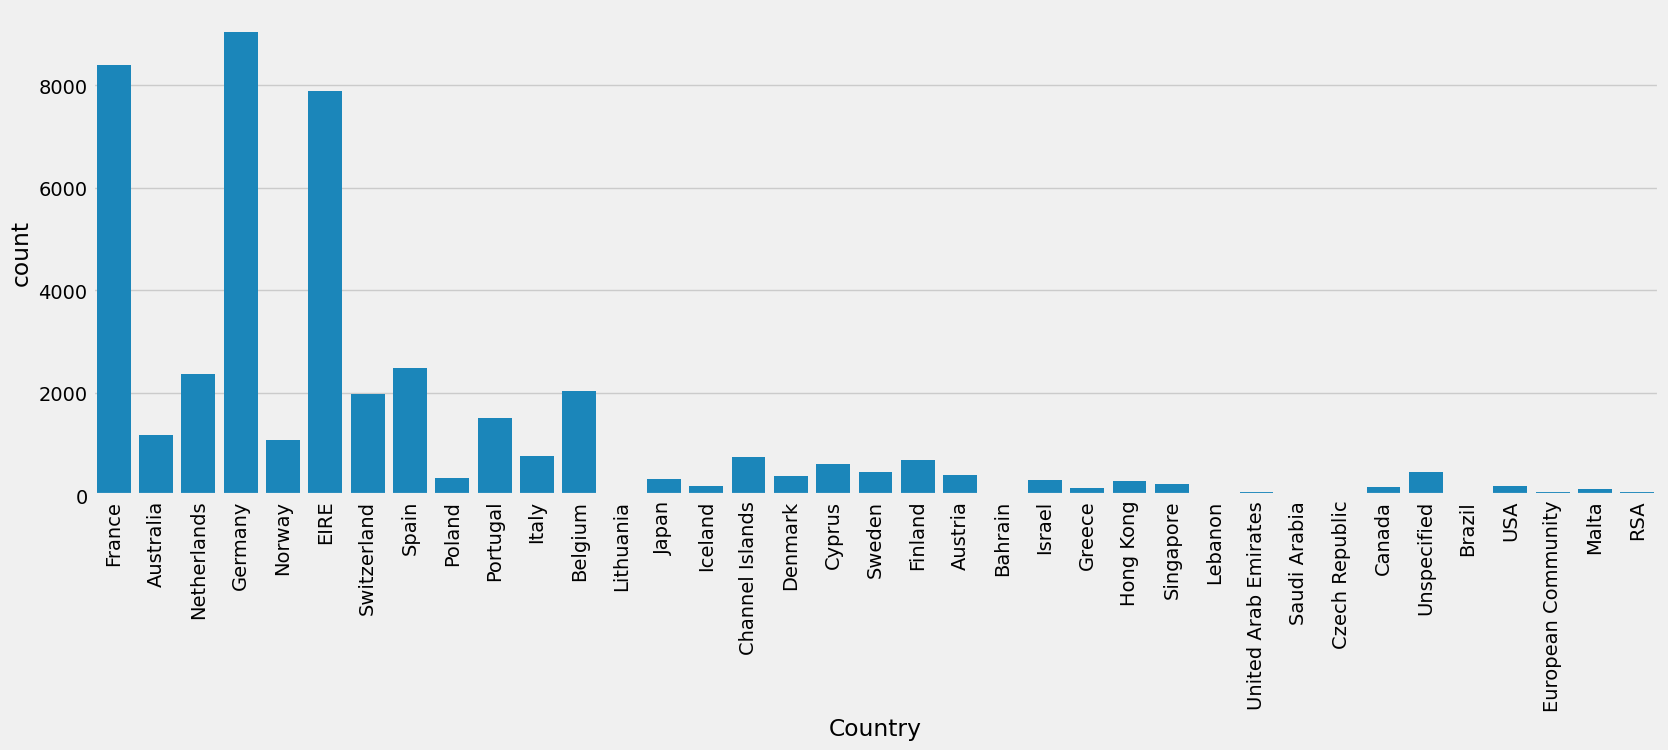

In [36]:
plt.figure(figsize=(18,6))
sns.countplot(x=df[df['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)

In [37]:
uk_count = df[df['Country'] == 'United Kingdom']['Country'].count()
all_count = df['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

91.51%


From the above plots and calculations, we can see that the vast majority of sales were made in the UK and just 8.49% went abroad.
We can say our dataset is skewed to the UK side.

# **Detecting Outliers**

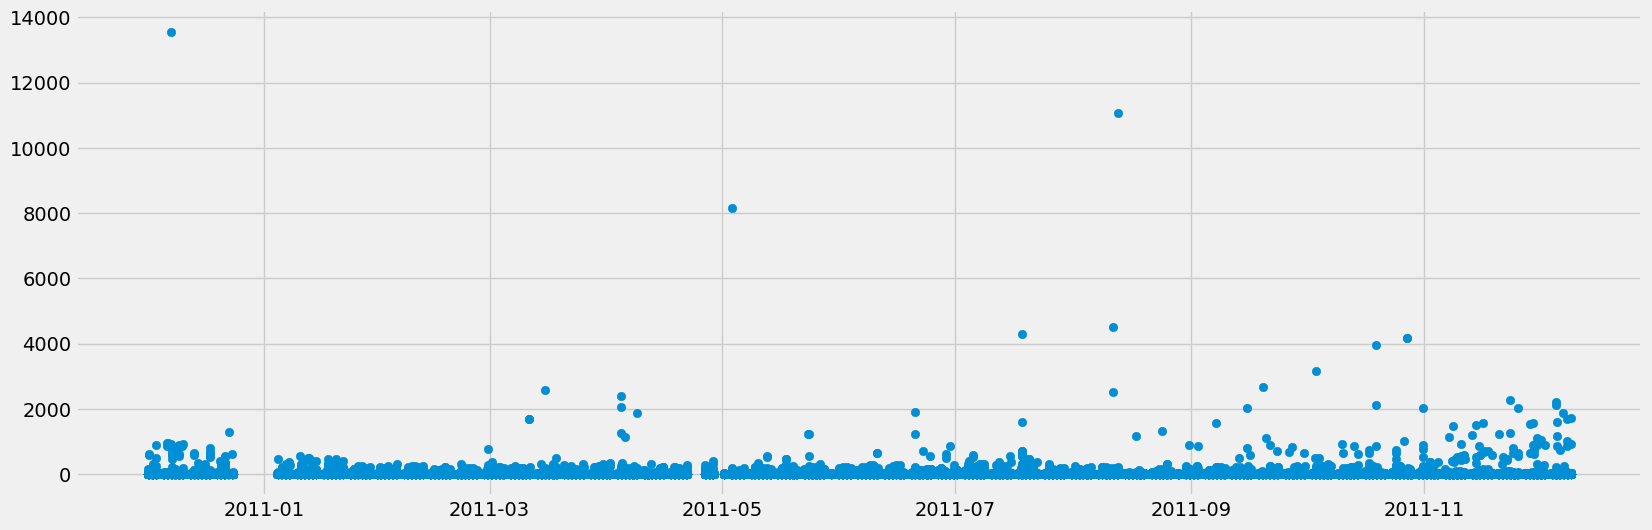

In [38]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice']) #using scatter plot

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15034.0, 0, '2011-03'),
  Text(15095.0, 0, '2011-05'),
  Text(15156.0, 0, '2011-07'),
  Text(15218.0, 0, '2011-09'),
  Text(15279.0, 0, '2011-11')])

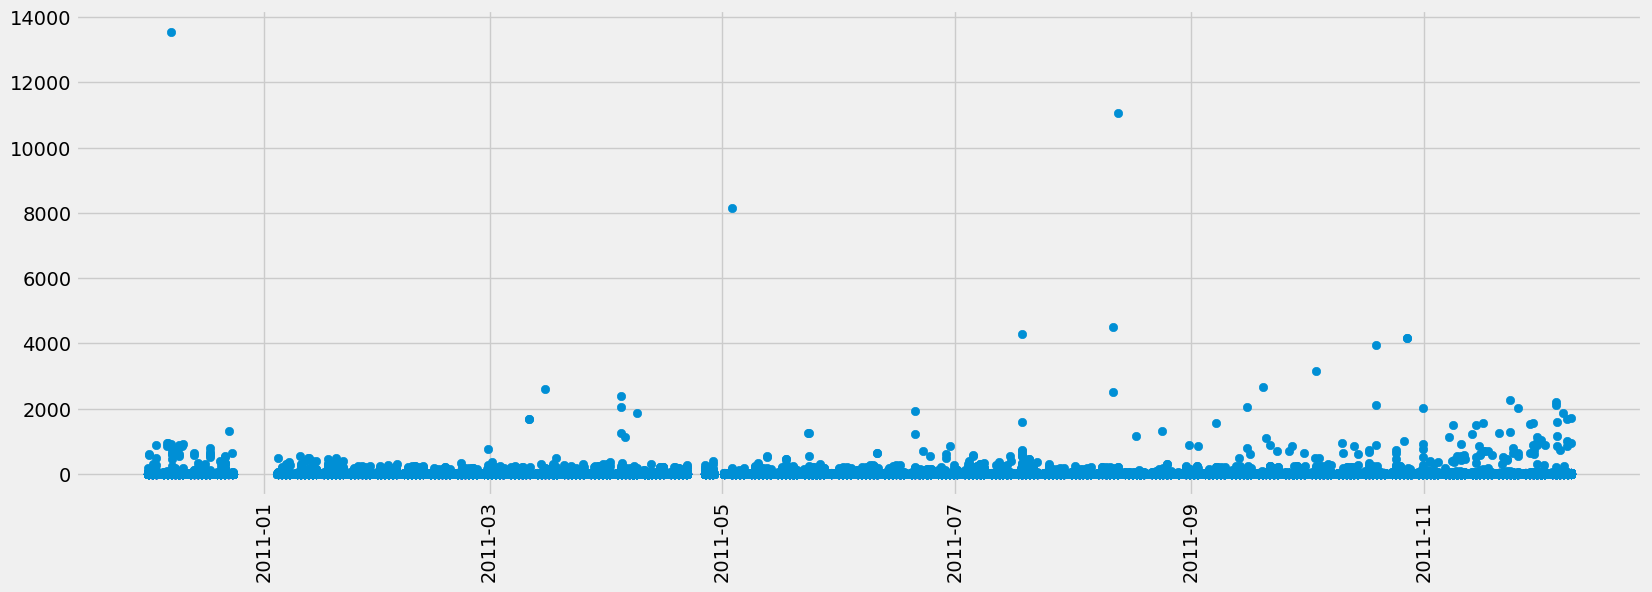

In [39]:
df = df[df['UnitPrice'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])
plt.xticks(rotation=90)

After removing obvious outliers we still see some values that are out of normal distribution.

In [48]:
import pandas as pd

# Convert 'UnitPrice' to numeric, coercing errors to NaN
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Remove rows with NaN values in 'UnitPrice'
df = df.dropna(subset=['UnitPrice'])

# Check for any remaining non-numeric values in 'UnitPrice'
non_numeric_values = df['UnitPrice'][~df['UnitPrice'].apply(lambda x: isinstance(x, (int, float)))]

# If there are non-numeric values, handle them appropriately (e.g., remove or convert)
if len(non_numeric_values) > 0:
    print("Non-numeric values found in 'UnitPrice':", non_numeric_values)
    # Choose an appropriate action, such as:
    # df = df[df['UnitPrice'].apply(lambda x: isinstance(x, (int, float)))]  # Remove rows with non-numeric values
    # or attempt further conversion logic

# Now, calculate quantiles safely
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999], numeric_only=True)

,Quantity,UnitPrice
0.050,1.000,0.42
0.950,30.000,9.95
0.980,72.000,14.95
0.990,100.000,16.98
0.999,449.794,165.00


(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15034.0, 0, '2011-03'),
  Text(15095.0, 0, '2011-05'),
  Text(15156.0, 0, '2011-07'),
  Text(15218.0, 0, '2011-09'),
  Text(15279.0, 0, '2011-11')])

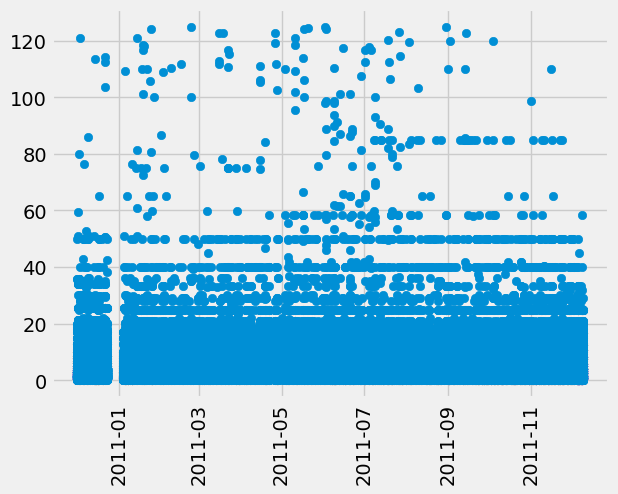

In [49]:
df_quantile = df[df['UnitPrice'] < 125]
plt.scatter(x=df_quantile.index, y=df_quantile['UnitPrice'])
plt.xticks(rotation=90)

In [50]:
df_quantile.describe()

,Quantity,UnitPrice
count,529361.000000,529361.000000
mean,10.555237,3.306499
std,155.632810,4.006631
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,124.870000


Looks like our data is almost ready for modelling.
We performed a clean up, we removed outliers that were disturbing the balance of our dataset, we removed invalid records.
Now our data looks much better! and it doesn't lose it's value.

# **Visually checking distribution of numeric features**

<Axes: ylabel='Density'>

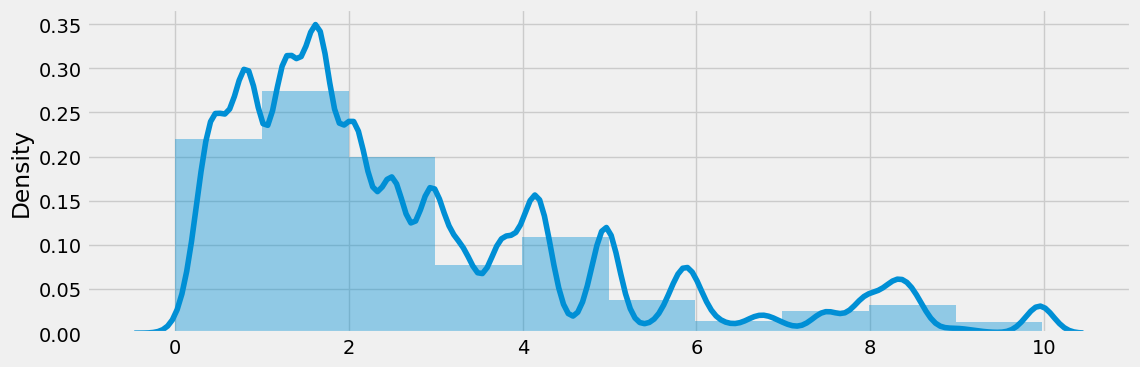

In [51]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)

<Axes: ylabel='Density'>

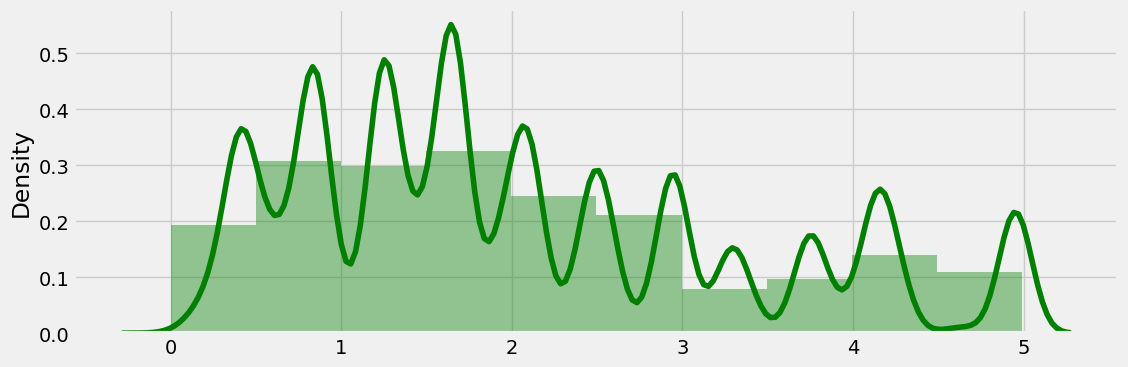

In [52]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='green')

From these histograms, we can see that the vast majority of items sold in this store have a low price range - 0 to 3 pounds.

<Axes: xlabel='Quantity', ylabel='Density'>

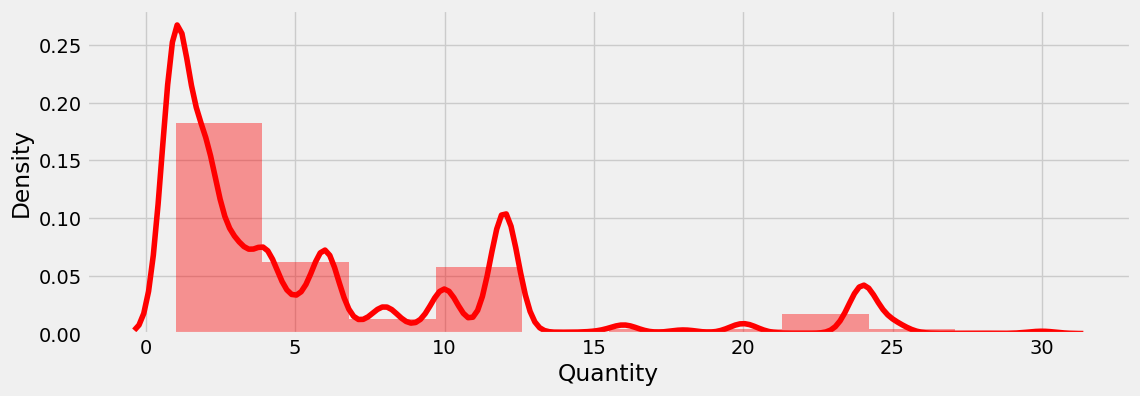

In [53]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='red')

<Axes: xlabel='Quantity', ylabel='Density'>

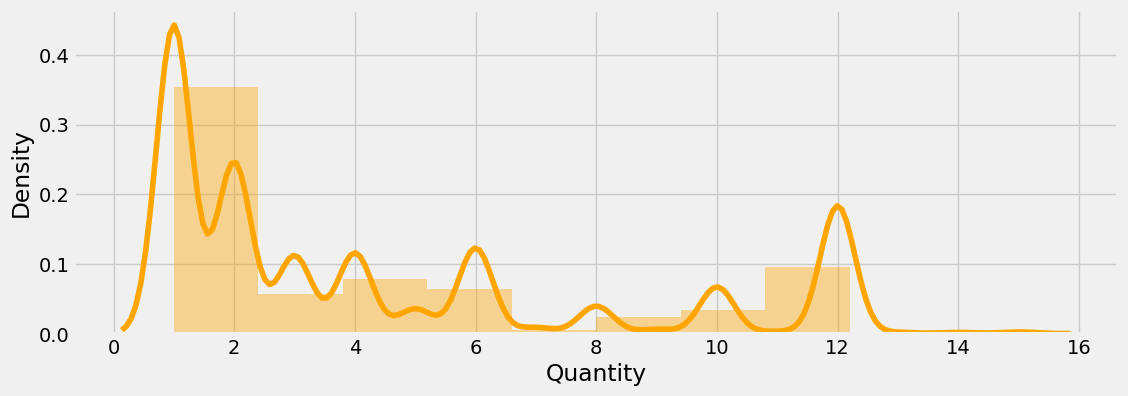

In [54]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 15]['Quantity'], kde=True, bins=10, color='orange')

From these histograms we that people bought normally 1-5 items or 10-12

<Axes: xlabel='UnitPrice', ylabel='Density'>

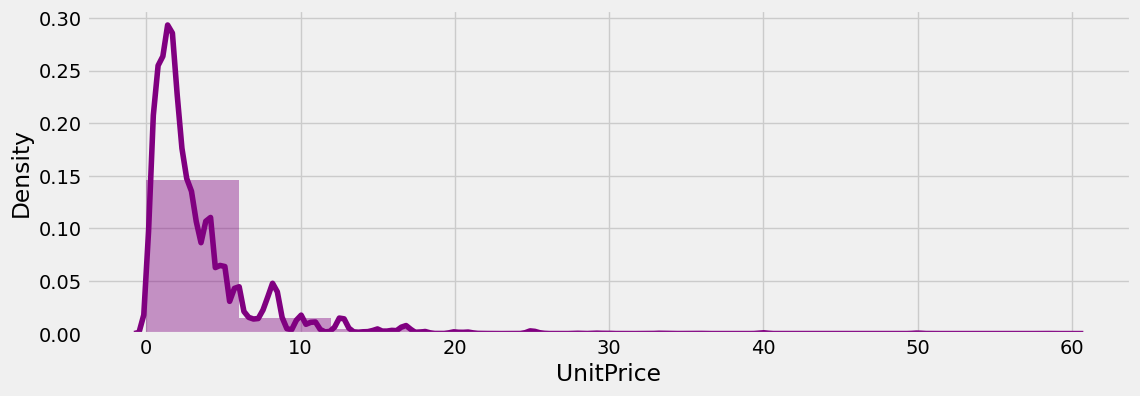

In [55]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 60]['UnitPrice'], kde=True, bins=10, color='purple')

<Axes: xlabel='UnitPrice', ylabel='Density'>

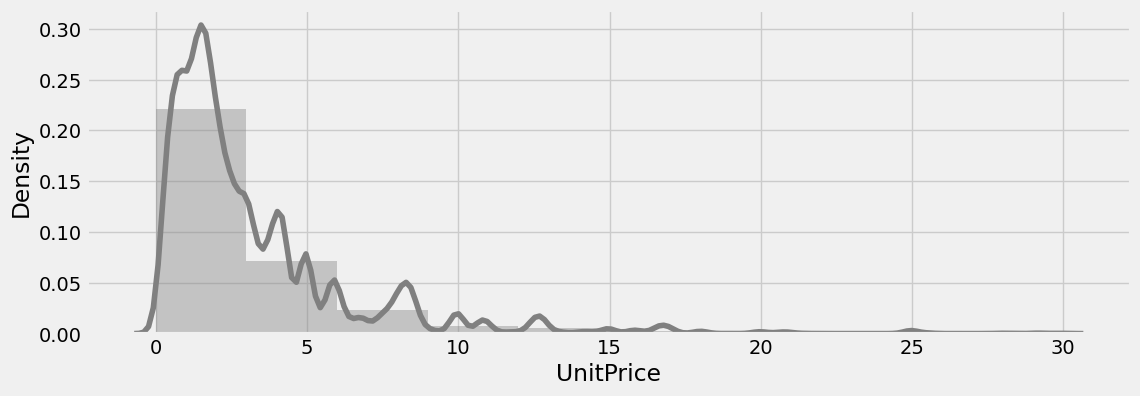

In [56]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 30]['UnitPrice'], kde=True, bins=10, color='grey')

From these histograms, we can understand that majority of sales per order were in the range 1-15 pounds each.

# **Analysing sales over time**

In [57]:
df_ts = df[['UnitPrice']]
df_ts.head()

,UnitPrice
InvoiceDate,
2010-12-01 08:26:00,2.55
2010-12-01 08:26:00,3.39
2010-12-01 08:26:00,2.75
2010-12-01 08:26:00,3.39
2010-12-01 08:26:00,3.39


As we can see every invoice has its own timestamp (definitely based on the time the order was made).
We can resample time data by, for example, weeks, and try to see if there are any patterns in our sales.

<Axes: xlabel='InvoiceDate'>

<Figure size 1800x600 with 0 Axes>

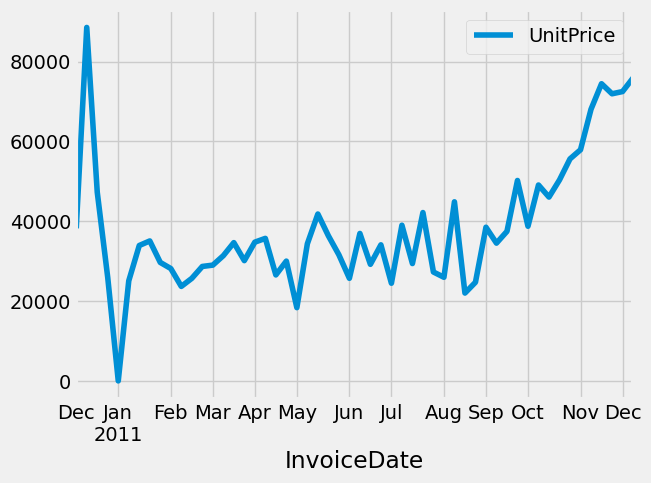

In [58]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

That week with 0 sales in January looks suspicious, let's check it closer.

In [59]:
df_resample['12-2010':'01-2011']

,UnitPrice
InvoiceDate,
2010-12-05,38224.49
2010-12-12,88540.65
2010-12-19,47278.94
2010-12-26,25860.39
2011-01-02,0.00
2011-01-09,25072.03
2011-01-16,33919.09
2011-01-23,35064.34
2011-01-30,29676.45


may be new year holiday

# **Preparing data for modeling and feature creation**
Now comes the most fun part of the project - building a model.
To do this we will need to create a few more additional features to make our model more sophisticated.

In [61]:
df_clean = df[df['UnitPrice'] < 15]
df_clean.describe()

,Quantity,UnitPrice
count,520395.000000,520395.000000
mean,10.707578,2.978730
std,156.962876,2.669826
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,12.000000,4.130000
max,80995.000000,14.960000


In [62]:
df_clean.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=520395, freq=None)

In [63]:
df_join = df_clean.groupby('InvoiceNo')[['Quantity']].sum()#Quantity per invoice feature

In [64]:
df_join = df_join.reset_index()
df_join.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [65]:
df_clean['InvoiceDate'] = df_clean.index
df_clean = df_clean.merge(df_join, how='left', on='InvoiceNo')
df_clean = df_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df_clean.tail(15)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv
520380,581587,22631,CIRCUS PARADE LUNCH BOX,12,1.95,France,2011-12-09 12:50:00,105
520381,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,France,2011-12-09 12:50:00,105
520382,581587,22555,PLASTERS IN TIN STRONGMAN,12,1.65,France,2011-12-09 12:50:00,105
520383,581587,22728,ALARM CLOCK BAKELIKE PINK,4,3.75,France,2011-12-09 12:50:00,105
520384,581587,22727,ALARM CLOCK BAKELIKE RED,4,3.75,France,2011-12-09 12:50:00,105
520385,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,3.75,France,2011-12-09 12:50:00,105
520386,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,3.75,France,2011-12-09 12:50:00,105
520387,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,1.95,France,2011-12-09 12:50:00,105
520388,581587,22629,SPACEBOY LUNCH BOX,12,1.95,France,2011-12-09 12:50:00,105
520389,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,4.15,France,2011-12-09 12:50:00,105


In [66]:
df_clean.describe()

,Quantity,UnitPrice,InvoiceDate,QuantityInv
count,520395.000000,520395.000000,520395,520395.000000
mean,10.707578,2.978730,2011-07-05 01:44:16.782867456,533.624937
min,1.000000,0.001000,2010-12-01 08:26:00,1.000000
25%,1.000000,1.250000,2011-03-28 13:28:00,152.000000
50%,4.000000,2.080000,2011-07-20 16:12:00,300.000000
75%,12.000000,4.130000,2011-10-19 13:58:00,567.000000
max,80995.000000,14.960000,2011-12-09 12:50:00,80995.000000
std,156.962876,2.669826,NaN,903.091973


In [67]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [68]:
df_clean.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
UnitPrice,float64
Country,object
InvoiceDate,datetime64[ns]
QuantityInv,int64


# **Bucketing Quantity and UnitPrice features**
Based on the EDA done previously we can group these features into 6 buckets for Quantity and 5 for UnitePrice using the pandas.cut() method.

In [69]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df_clean['QuantityRange'] = pd.cut(df_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=bins_p)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"


In [70]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.head()
#extracting bucketing dates

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12


In [71]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
520390,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,2011-12-09 12:50:00,105,"(11, 14]","(0, 1]",12,"(9, 12]"
520391,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,2011-12-09 12:50:00,105,"(5, 8]","(2, 3]",12,"(9, 12]"
520392,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
520393,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
520394,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,France,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"


# **Building a model**

In [72]:
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']
df_abroad = df_clean[df_clean['Country'] != 'United Kingdom']

#Splitting data into UK and non-UK

In [73]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"


# **Extracting features and creating dummy variables**

In [74]:
df_uk_model = df_uk[['UnitPrice', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]

In [75]:
df_uk_model.head()

,UnitPrice,QuantityInv,QuantityRange,PriceRange,DateRange
0,2.55,40,"(5, 8]","(2, 3]","(9, 12]"
1,3.39,40,"(5, 8]","(3, 4]","(9, 12]"
2,2.75,40,"(5, 8]","(2, 3]","(9, 12]"
3,3.39,40,"(5, 8]","(3, 4]","(9, 12]"
4,3.39,40,"(5, 8]","(3, 4]","(9, 12]"


In [76]:
df_data = df_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,UnitPrice,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,2.55,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
1,3.39,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,2.75,40,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
3,3.39,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
4,3.39,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


# **Scaling**

In [77]:
from sklearn.preprocessing import scale

df_data['QuantityInv'] = scale(df_data['QuantityInv'])

Train-Test Split

In [78]:
y = df_data['UnitPrice']
X = df_data.drop(columns=['UnitPrice'])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# **Testing and validating different models**
We use GridSearch and CrossValidation to test three types of regressors:
Linear
Decision Tree
RandomForest

In [80]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ** Linear Regression**

In [81]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

Decision Tree

In [82]:
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# **Random Forest**

In [83]:
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

# **Testing and validating**

In [84]:
cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_))
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))

  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.7539420804197905
MAE for LinearRegression
0.715311974025125
MSE for LinearRegression
1.7357713929975975
R2 score for LinearRegression
0.755062349421775
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.7548595905394551
MAE for DecisionTreeRegressor
0.6498342879864452
MSE for DecisionTreeRegressor
1.7031245795779033
R2 score for DecisionTreeRegressor
0.7596691967348166
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.7604798198181101
MAE for RandomForest
0.6466651212969898
MSE for RandomForest
1.6737847242688537
R2 score for RandomForest
0.7638093935698924
 === End of repor

# **Creating summary report**

In [86]:
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# **Visualizing results**

<Axes: title={'center': 'Regressor Comparison'}, xlabel='Best score', ylabel='Regressor'>

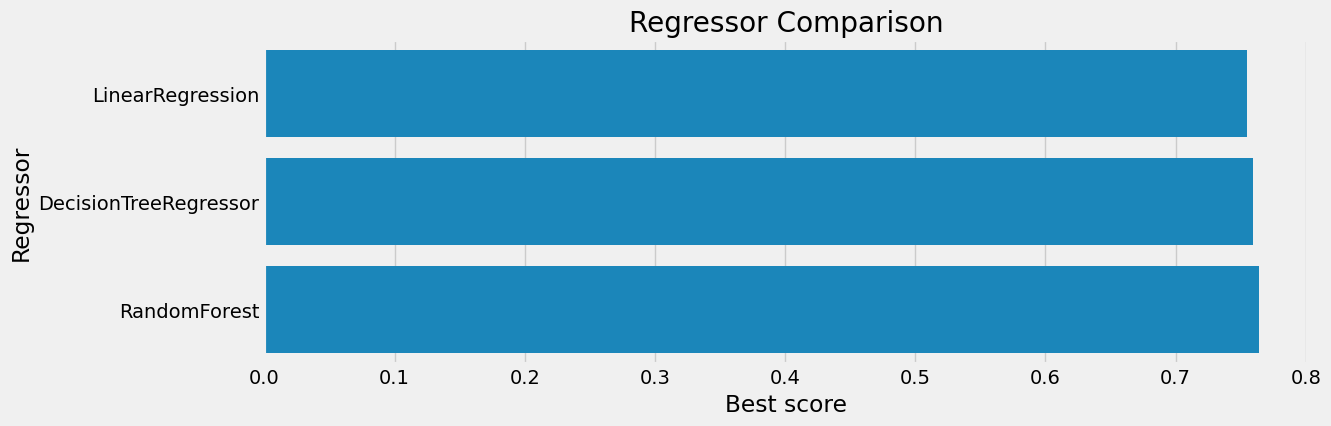

In [87]:
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

# **Conclusions**
This is a basic analysis of a transactions dataset with a model that predicts sales.

Random Forest Regressor appears to be the best model for our prediction with an R2 score of more than 0.6 which is not that bad.